### Problem 1
Simulate different non-linear models. Three good models to start out with
are: SETAR(2;1;1), IGAR(2;1), and MMAR(2;1). Try different parameters.
For reporting, write the models and discuss the most essential features of
each model together with some informative plots.
Hints
R and Matlab: Check out the script 3dPlotting.R. It starts out showing a
simple way to implement a simulation of a process with a for-loop.

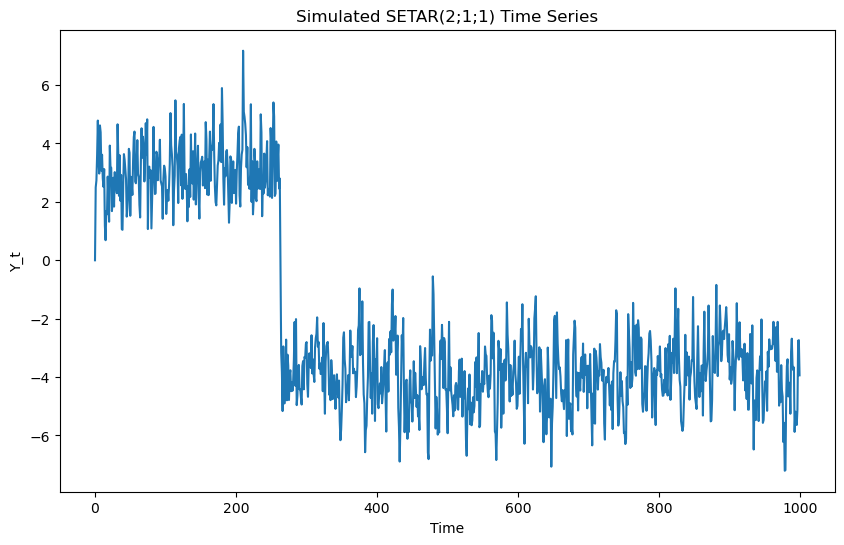

In [ ]:
# Simulate SETAR(2;1;1) with different parameters and plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
a_0_1 = -2
a_1_1 = 0.5
a_0_2 = 2
a_1_2 = 0.35

n = 1000
Y = np.zeros(n)
for t in range(1, n):
    if Y[t-1] < 0:
        Y[t] = a_0_1 + a_1_1* Y[t-1] + np.random.normal()
    else:
        Y[t] = a_0_2 + a_1_2 * Y[t-1] + np.random.normal()
df = pd.DataFrame(Y, columns=['Value'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Value')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('Y_t')
plt.show()